In [129]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mutual_info_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split

In [130]:
df=pd.read_csv("housing.csv")
df.columns=df.columns.str.lower().str.replace(' ','_')
strings=list(df.dtypes[df.dtypes==object].index)
strings
for col in strings:
    df[col]=df[col].str.lower().str.replace(' ','_')

In [131]:
df.total_bedrooms.fillna(df.total_bedrooms.median())

0         129.0
1        1106.0
2         190.0
3         235.0
4         280.0
          ...  
20635     374.0
20636     150.0
20637     485.0
20638     409.0
20639     616.0
Name: total_bedrooms, Length: 20640, dtype: float64

In [132]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [133]:
df['rooms_per_household']=df.total_rooms/df.households
df['bedrooms_per_room']=df.total_bedrooms/df.total_rooms
df['population_per_household']=df.population/df.households

In [134]:
df.head().T

,0,1,2,3,4
longitude,-122.23,-122.22,-122.24,-122.25,-122.25
latitude,37.88,37.86,37.85,37.85,37.85
housing_median_age,41.0,21.0,52.0,52.0,52.0
total_rooms,880.0,7099.0,1467.0,1274.0,1627.0
total_bedrooms,129.0,1106.0,190.0,235.0,280.0
population,322.0,2401.0,496.0,558.0,565.0
households,126.0,1138.0,177.0,219.0,259.0
median_income,8.3252,8.3014,7.2574,5.6431,3.8462
median_house_value,452600.0,358500.0,352100.0,341300.0,342200.0
ocean_proximity,near_bay,near_bay,near_bay,near_bay,near_bay


In [135]:
df['ocean_proximity'].mode()

0    <1h_ocean
Name: ocean_proximity, dtype: object

In [136]:
data_numeric=df.copy()
data_numeric=data_numeric.drop(['ocean_proximity','median_house_value'],axis=1)
data_numeric.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.027540,0.092657,0.002476
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,0.106389,-0.113815,0.002366
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,-0.153277,0.136089,0.013191
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.133798,-0.187900,-0.024581
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.001538,0.084238,-0.028355
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.072213,0.035319,0.069863
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,-0.080598,0.065087,-0.027309
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.326895,-0.615661,0.018766
rooms_per_household,-0.027540,0.106389,-0.153277,0.133798,0.001538,-0.072213,-0.080598,0.326895,1.000000,-0.416952,-0.004852
bedrooms_per_room,0.092657,-0.113815,0.136089,-0.187900,0.084238,0.035319,0.065087,-0.615661,-0.416952,1.000000,0.002938


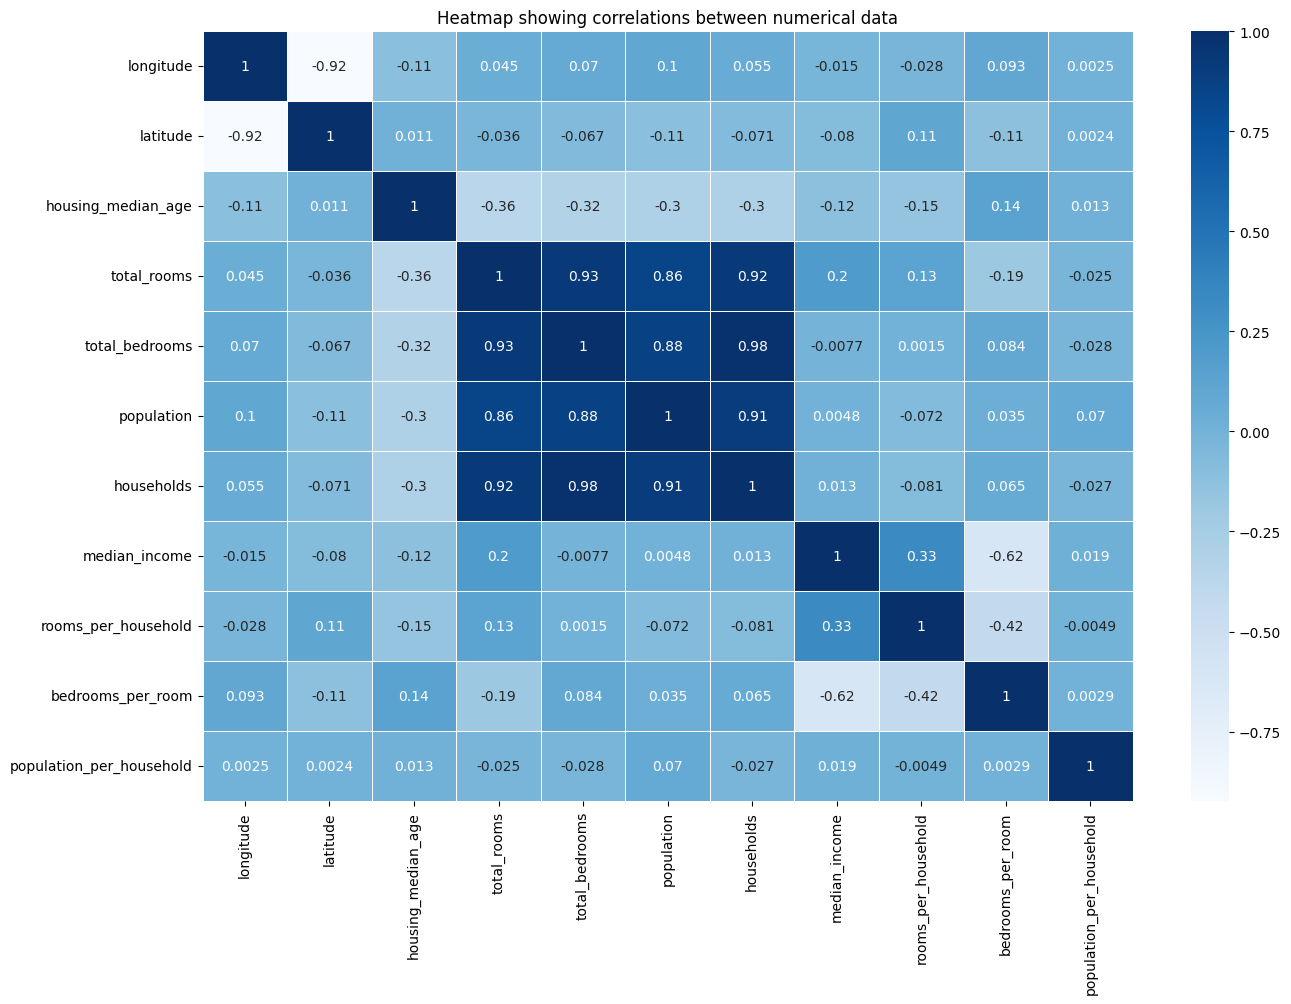

In [137]:
plt.figure(figsize=(15,10))  
sns.heatmap(data_numeric.corr(),annot=True,linewidths=.5, cmap="Blues")
plt.title('Heatmap showing correlations between numerical data')
plt.show()
     

In [138]:
data_class=df.copy()
mean=data_class['median_house_value'].mean()
data_class['above_average']=np.where(data_class['median_house_value']>=mean,1,0)

In [139]:
from sklearn.model_selection import train_test_split
df_full_train,df_test=train_test_split(data_class,test_size=0.2,random_state=42)
df_train,df_val=train_test_split(df_full_train,test_size=0.25,random_state=42)
len(df_train),len(df_val),len(df_test)

(12384, 4128, 4128)

In [140]:
df_train=df_train.reset_index(drop=True)
df_val=df_val.reset_index(drop=True)
df_test=df_test.reset_index(drop=True)

In [141]:
y_train = df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values

In [142]:
cat = ['ocean_proximity']
def calculate_mi(series):
    return mutual_info_score(series, df_train.above_average)
df_mi = df_train[cat].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')
df_mi

,MI
ocean_proximity,0.101384


In [143]:
del df_train['above_average']
del df_val['above_average']
del df_test['above_average']
num = ["longitude", "latitude", "housing_median_age", "total_rooms", "total_bedrooms", "population", "households", "median_income", "rooms_per_household", 
       "bedrooms_per_room", "population_per_household"]
train_dict = df_train[cat + num].to_dict(orient='records')

In [144]:
dv=DictVectorizer(sparse=False)
train_dict=df_train[cat+num].to_dict(orient='records')
X_train=dv.fit_transform(train_dict)




In [145]:
model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [158]:
val_dict=df_val[cat + num].to_dict(orient='records')
X_val=dv.transform(val_dict)
y_pred=model.predict(X_val)
accuracy = np.round(accuracy_score(y_val, y_pred),2)
print(accuracy)



0.84


In [159]:
features = cat + num
features

['ocean_proximity',
 'longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'rooms_per_household',
 'bedrooms_per_room',
 'population_per_household']

In [160]:
orig_score = accuracy

for c in features:
    subset = features.copy()
    subset.remove(c)
    
    train_dict = df_train[subset].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    dv.fit(train_dict)

    X_train = dv.transform(train_dict)

    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)

    val_dict = df_val[subset].to_dict(orient='records')
    X_val = dv.transform(val_dict)

    y_pred = model.predict(X_val)

    score = accuracy_score(y_val, y_pred)
    print(c, orig_score - score, score)

ocean_proximity 0.019263565891472822 0.8207364341085271
longitude 0.008604651162790633 0.8313953488372093
latitude 0.005697674418604581 0.8343023255813954
housing_median_age 0.010058139534883659 0.8299418604651163
total_rooms 0.0027906976744185297 0.8372093023255814
total_bedrooms 0.004001937984496107 0.8359980620155039
population 0.013691860465116279 0.8263081395348837
households 0.00642441860465115 0.8335755813953488
median_income 0.05245155038759686 0.7875484496124031
rooms_per_household 0.004970930232558124 0.8350290697674418
bedrooms_per_room 0.003759689922480547 0.8362403100775194
population_per_household 0.0032751937984495383 0.8367248062015504


0        2.640682
1        2.623921
2        2.622614
3        2.620349
4        2.620541
           ...   
20635    2.506811
20636    2.505760
20637    2.520339
20638    2.513404
20639    2.517768
Name: median_house_value, Length: 20640, dtype: float64

In [ ]:
df['median_house_value']=np.log1p(df['median_house_value'])


In [165]:
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=42)

In [166]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [167]:
y_train = df_train.median_house_value.values
y_val = df_val.median_house_value.values
y_test = df_test.median_house_value.values

In [168]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [169]:
train_dict = df_train[cat + num].to_dict(orient='records')

In [ ]:
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

X_train = dv.transform(train_dict)

val_dict = df_val[cat + num].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [170]:
for a in [0, 0.01, 0.1, 1, 10]:
    model = Ridge(alpha=a, solver="sag", random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_val)
    
    score = np.sqrt(mean_squared_error(y_val, y_pred))
    
    print(a, round(score, 4))

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0 0.0113


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.01 0.0113


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.1 0.0113


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


1 0.0113
10 0.0113


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
